In [1]:
%run base.ipynb
import gym
import matplotlib.pyplot as plt

from abides_gym_market_making_environment import *
from policies import SigPolicy
from train import train
import utils

In [2]:
# register market making env for gym use 
from gym.envs.registration import register

register(
    id="market-making-v0",
    entry_point=SubGymMarketsMarketMakingEnv_v0,
)

def generate_env(seed):
    """
    generates specific environment with the parameters defined and set the seed
    """
    env = gym.make(
            "market-making-v0",
            background_config="rmsc04",
            mkt_close="11:45:00",
            timestep_duration="5s",
            order_fixed_size=10,
            first_interval="00:13:00",
            max_inventory=100,
            remaining_inventory_reward=-100,#penalty
            inventory_reward_dampener=0.6,
            damp_mode="asymmetric",
            debug_mode=False
        )

    env.seed(seed)
    
    return env

In [3]:
# create the environment
env = generate_env(5)

In [4]:
episodes = 10
lr = 0.01
window_length = 12
eps = 0.9
eps_decay = utils.linear_decay(epochs=1_000, start=eps, end=0.2)

sigpolicy = SigPolicy(env, 2)
sigpolicy.initialize_parameters(zero_bias=True)

results = train(env, 
                sigpolicy, 
                episodes,
                discount=0.97,
                learning_rate=lr, 
                epsilon=eps,
                epsilon_decay=eps_decay,
                window_length=window_length, 
                printing=False)

print(sigpolicy.linear.weight.data)


  0%|          | 0/10 [00:00<?, ?it/s]Epsiode 0 | step 200 | reward 0.15530000000000005 | loss 1.3091331472381853
Q values: tensor([0.6001, 0.6087, 0.6165, 0.6236, 0.6300, 0.6359, 0.6414, 0.6465, 0.6514,
        0.6561], grad_fn=<CatBackward>)
Epsiode 0 | step 400 | reward 1.9612399999999997 | loss 40.78632737867242
Q values: tensor([0.8866, 0.9090, 0.9281, 0.9440, 0.9568, 0.9664, 0.9730, 0.9766, 0.9774,
        0.9753], grad_fn=<CatBackward>)
Epsiode 0 | step 600 | reward 0.7645300000000003 | loss 2851.570317920183
Q values: tensor([2.3053, 2.3103, 2.3166, 2.3241, 2.3326, 2.3422, 2.3527, 2.3640, 2.3762,
        2.3891], grad_fn=<CatBackward>)
Epsiode 0 | step 792 | reward 1.2492199999999973 | loss 2870.626641020807
Q values: tensor([2.2040, 2.1463, 2.0937, 2.0459, 2.0028, 1.9641, 1.9296, 1.8993, 1.8728,
        1.8500], grad_fn=<CatBackward>)
 10%|█         | 1/10 [01:07<10:04, 67.12s/it]Epsiode 1 | step 200 | reward 0.5239700000000002 | loss 285.7304966565098
Q values: tensor([1.0412

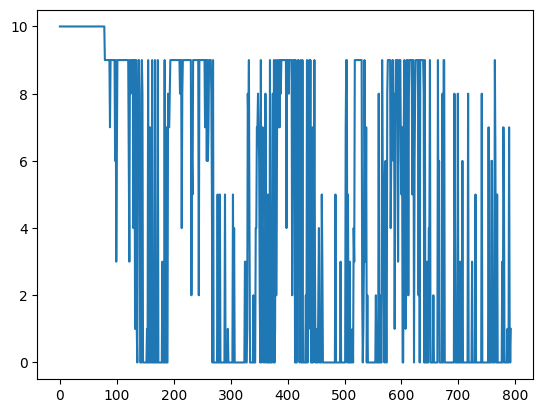

In [10]:
plt.plot(results["actions"][-1])
#plt.plot(results["losses"])
#plt.plot([reward if reward > -2000 else 0 for reward in results["rewards"]])

hist = list(results["history"])
#plt.plot(np.array(hist)[:,3])


In [ ]:
import pickle

# write results 
with open('../results/error.pkl', 'wb') as f:  # open a text file
    pickle.dump(results, f) # serialize the list
f.close()

In [ ]:
# load results
with open('../results/error.pkl', 'rb') as f:
    deserialized_results = pickle.load(f)
f.close()